In [26]:
#  Author: James Huddleston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
sns.set()

In [27]:
#
#l  oad data set csv from url as df
df = pd.read_csv('https://raw.githubusercontent.com/jrhudlstn/DataSets/master/universityRanking2012.csv') 
df_csv=df.copy()

In [28]:
# select out only the attributes needed for the analysis requirements for the Smith family, John (john_df) and Jane (jane_df).
# the .copy() functions is used to not copy over the original df . Without .copy() the first, john_df might change the df and jane_df would be contaminated.
john_df = df[[ 'alumni_employment','institution','country']].copy()
jane_df = df[['publications', 'institution','country']].copy()

In [29]:
#print(jane_df.head(33)) # list Jane's df from the raw data for first 33 
# does John or Jane's dataframe contain missing values?
print("____")
john_df.isnull().sum()
# no missing values, no data cleansing needed

____


alumni_employment    0
institution          0
country              0
dtype: int64

In [30]:
print("____")
jane_df.isnull().sum()
# no missing values, no data cleansing needed

____


publications    0
institution     0
country         0
dtype: int64

In [31]:
# first step is to create a list based on country attribute for each child: Jane and John.
john_df_country = john_df['country']=='USA' 
#jane_df_country = 

In [32]:
print(john_df_country.shape)

(2200,)


In [33]:
print(john_df_country.head())

0     True
1     True
2     True
3    False
4     True
Name: country, dtype: bool


In [34]:
# create a data set of boolean values 
john_countrys = ['USA', 'United Kingdom']
jane_countrys =['USA', 'United Kingdom', 'Israel']
john_choosen_countrys=john_df[john_df.country.isin(john_countrys)]
john_choosen_countrys.shape
jane_choosen_countrys=jane_df[jane_df.country.isin(jane_countrys)]
jane_choosen_countrys.shape
# use the above boolean data set created to select out matching rows
# below is the array of childrens selected countries. These arrays are used to do the rest of the comparisons. 
#john_choosen_countrys.country.unique()
#jane_choosen_countrys.country.unique()
#print(john_choosen_countrys.head())
#print(jane_choosen_countrys.head())
#print(john_choosen_countrys) # print the new array for john for his choice in country's
print(jane_choosen_countrys) # print the new array for jane for her choice in country's

      publications                            institution         country
0                1                     Harvard University             USA
1               12  Massachusetts Institute of Technology             USA
2                4                    Stanford University             USA
3               16                University of Cambridge  United Kingdom
4               37     California Institute of Technology             USA
...            ...                                    ...             ...
2105           888                     Oakland University             USA
2112           917             University of North Dakota             USA
2128           910         University of Texas at El Paso             USA
2135           899       University of California, Merced             USA
2137           946       University of Central Lancashire  United Kingdom

[739 rows x 3 columns]


In [35]:
# take the newly created dataframes for Jane and John and subset  rows universities 
#that will be choosen exist in the top ten rows.
john_choosen_countrys_employ = john_choosen_countrys[['alumni_employment', 'institution','country']]#[:10]
jane_choosen_countrys_public = jane_choosen_countrys[[ 'publications', 'institution','country']]#[:10]

In [36]:
#print(john_choosen_countrys_employ)
#print(jane_choosen_countrys_public)

In [37]:
# rank the employment 
john_choosen_countrys_employ["alumni_employment"] = john_choosen_countrys_employ["alumni_employment"].rank() 
john_choosen_countrys_employ

,alumni_employment,institution,country
0,13.0,Harvard University,USA
1,37.0,Massachusetts Institute of Technology,USA
2,17.0,Stanford University,USA
3,55.0,University of Cambridge,United Kingdom
4,68.5,California Institute of Technology,USA
...,...,...,...
2105,674.0,Oakland University,USA
2112,674.0,University of North Dakota,USA
2128,506.5,University of Texas at El Paso,USA
2135,674.0,"University of California, Merced",USA


In [38]:
# rank the publications
jane_choosen_countrys_public["publications"] = jane_choosen_countrys_public["publications"].rank()
jane_choosen_countrys_public

,publications,institution,country
0,2.5,Harvard University,USA
1,41.0,Massachusetts Institute of Technology,USA
2,11.5,Stanford University,USA
3,54.5,University of Cambridge,United Kingdom
4,119.0,California Institute of Technology,USA
...,...,...,...
2105,685.0,Oakland University,USA
2112,703.0,University of North Dakota,USA
2128,699.5,University of Texas at El Paso,USA
2135,690.5,"University of California, Merced",USA


In [39]:
john_choosen_countrys_employ = john_choosen_countrys[[ 'alumni_employment', 'institution','country']]#[:10]
jane_choosen_countrys_public = jane_choosen_countrys[[ 'publications', 'institution','country']]#[:10]
#
john_choosen_countrys_employ["rank_quality_of_employment"] = john_choosen_countrys_employ["alumni_employment"].rank() 
john_choosen_countrys_employ.sort_values("rank_quality_of_employment", inplace=True)
john_choosen_countrys_employ
#
jane_choosen_countrys_public["rank_publications"] = jane_choosen_countrys_public ["publications"].rank()
jane_choosen_countrys_public.sort_values("rank_publications", inplace=True)
jane_choosen_countrys_public

,publications,institution,country,rank_publications
0,1,Harvard University,USA,2.5
200,1,Harvard University,USA,2.5
100,1,Harvard University,USA,2.5
1200,1,Harvard University,USA,2.5
33,2,"University of Michigan, Ann Arbor",USA,5.0
...,...,...,...,...
1644,988,University of Dayton,USA,735.0
737,991,University of Dayton,USA,736.0
1034,992,"Queens College, City University of New York",USA,737.0
822,993,Albany Medical College,USA,738.0


In [40]:
from collections import Counter

In [41]:
print(Counter(john_choosen_countrys_employ['country']))
print(Counter(jane_choosen_countrys_public['country']))

Counter({'USA': 573, 'United Kingdom': 144})
Counter({'USA': 573, 'United Kingdom': 144, 'Israel': 22})


In [42]:
title_type_john = john_choosen_countrys_employ.groupby('country').agg('count')
title_type_jane = jane_choosen_countrys_public.groupby('country').agg('count')
#print(title_type)

In [43]:
# john
type_labels = title_type_john.rank_quality_of_employment.sort_values().index 
type_counts = title_type_john.rank_quality_of_employment.sort_values()
#jane
#type_labels = title_type-jane.rank_publications.sort_values().index 
#type_counts = title_type-jane.rank_publications.sort_values()

In [44]:
plt.figure(1, figsize=(20,10)) 
the_grid = GridSpec(2, 2)

<Figure size 1440x720 with 0 Axes>

In [45]:
cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

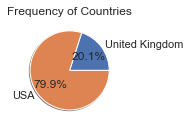

In [46]:
plt.subplot(the_grid[0, 1], aspect=1, title='Frequency of Countries')
type_show_ids = plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%', shadow=True)
plt.show()